In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, :-1]
    y = data[:, -1]
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
    return X, y

def calculate_cost(X, y, w):
    m = X.shape[0]
    h = X.dot(w)
    return np.sum((h - y)**2) / (2*m)

def stochastic_gradient_descent(X, y, learning_rate, num_iterations):
    m, n = X.shape
    w = np.zeros(n)
    costs = []
    
    for i in range(num_iterations):
        idx = np.random.randint(0, m)
        xi, yi = X[idx], y[idx]
        
        prediction = np.dot(xi, w)
        gradient = xi * (prediction - yi)
        w -= learning_rate * gradient
        
        if i % 100 == 0:  # Calculate cost every 100 iterations to reduce computation
            cost = calculate_cost(X, y, w)
            costs.append(cost)
    
    return w, costs


Testing learning rate: 0.1
Testing learning rate: 0.01
Testing learning rate: 0.001
Testing learning rate: 0.0001
Best learning rate: 0.001
Learned weight vector: [-0.00648409  0.0759771  -0.04027933 -0.02306003  0.64572373  0.01555689
  0.48020891  0.17737926]


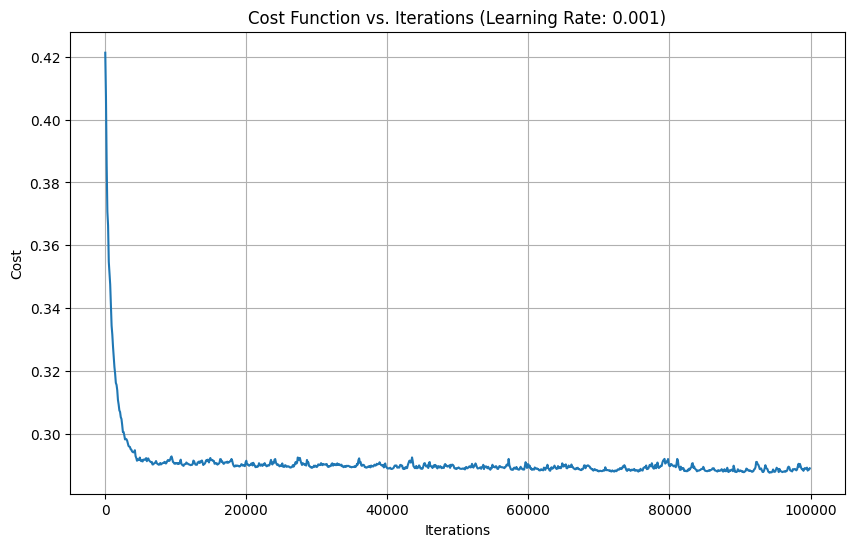

Cost function value on test data: 0.45219396183417876


In [2]:
# Load data
X_train, y_train = load_data('train.csv')
X_test, y_test = load_data('test.csv')

# Tune learning rate
learning_rates = [0.1, 0.01, 0.001, 0.0001]
num_iterations = 100000  # Increased for better convergence

best_lr = None
best_w = None
best_costs = None

for lr in learning_rates:
    print(f"Testing learning rate: {lr}")
    w, costs = stochastic_gradient_descent(X_train, y_train, lr, num_iterations)
    
    if best_lr is None or costs[-1] < best_costs[-1]:
        best_lr = lr
        best_w = w
        best_costs = costs

print(f"Best learning rate: {best_lr}")
print(f"Learned weight vector: {best_w}")

# Plot cost function
plt.figure(figsize=(10, 6))
plt.plot(range(0, num_iterations, 100), best_costs)
plt.title(f'Cost Function vs. Iterations (Learning Rate: {best_lr})')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

# Calculate cost for test data
test_cost = calculate_cost(X_test, y_test, best_w)
print(f"Cost function value on test data: {test_cost}")